## Semantic segmentation ##


1. Follow the tutorial at https://github.com/divamgupta/image-segmentation-keras which includes colab work sheet (https://colab.research.google.com/drive/1q_eCYEzKxixpCKH1YDsLnsvgxl92ORcv?usp=sharing). Try the given example.

2. The github repository contains implementations for various semantic segmentation frameworks. Modify the code to use fully convolutional network (fcn_32 defined in keras_segmentation.models.fcn). Compare the results.

In [ ]:
! pip install keras-segmentation
! wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip dataset1.zip

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 17.9 MB/s eta 0:00:00
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29056 sha256=627e9893eaa15a08cb05524d5ff589512f9b4c130da1b576daba4e40ac365026
  Stored in directory: /root/.cache/pip/wheels/2a/87/5b/ddc104c262fe1280e0565a2cc1b9b6b04963af12e462cdf068
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0
--2024-04-18 00:16:04--  https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to gith

In [ ]:
from keras_segmentation.models.fcn import fcn_32

model = fcn_32(n_classes=50 ,  input_height=320, input_width=640  )
model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/fcn_32_1" , epochs=5
)

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 145.84it/s]
/usr/local/lib/python3.10/dist-packages/keras_segmentation/train.py:156: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen, steps_per_epoch,


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 346s 655ms/step - loss: 3.9119 - accuracy: 0.0207
Epoch 2/5
512/512 [==============================] - 357s 697ms/step - loss: 3.9112 - accuracy: 0.0232
Epoch 3/5
512/512 [==============================] - 343s 670ms/step - loss: 3.9102 - accuracy: 0.0274
Epoch 4/5
512/512 [==============================] - 341s 668ms/step - loss: 3.9080 - accuracy: 0.0362
Epoch 5/5
512/512 [==============================] - 354s 692ms/step - loss: 3.9029 - accuracy: 0.0555


1/1 [==============================] - 2s 2s/step


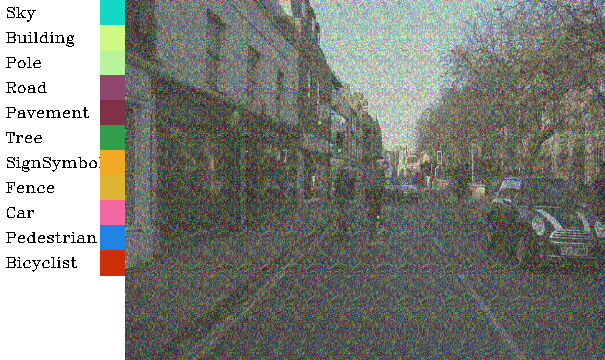

In [ ]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)
from IPython.display import Image
Image('/tmp/out.png')

## Class Activity Mapping ##

1. Following the tutorial for tf-keras-vis, visualise CAM for the Fashion MNIST model from the last lecture.  https://github.com/keisen/tf-keras-vis/blob/master/docs/examples/attentions.ipynb.

In [ ]:
# We use Fashion MNIST dataset, which is provided by Keras
# The following is the code to load data etc. same as last session

# import Keras & Tensorflow
import tensorflow as tf
from tensorflow import keras

# Load image data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data preparation:
#   Map intensities from [0--255] to 0.0--1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
# reshape: map data to 4D, with the last dimension of 1 channel (grayscale)
history = model.fit(x_train.reshape((x_train.shape[0], 28, 28, 1)), y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test.reshape(x_test.shape[0], 28, 28, 1), y_test)

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/60
1688/1688 [==============================] - 19s 8ms/step - loss: 1.3382 - accuracy: 0.5054 - val_loss: 0.6710 - val_accuracy: 0.7452
Epoch 2/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.7743 - accuracy: 0.7168 - val_loss: 0.5365 - val_accuracy: 0.7970
Epoch 3/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.6421 - accuracy: 0.7655 - val_loss: 0.4748 - val_accuracy: 0.8222
Epoch 4/60
1688/1688 [==============================] - 13s 8ms/step - loss: 0.5748 - accuracy: 0.7938 - val_loss: 0.4494 - val_accuracy: 0.8338
Epoch 5/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5296 - accuracy: 0.8122 - val_loss: 0.4110 - val_accuracy: 0.8418
Epoch 6/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4955 - accuracy: 0.8260 - val_loss: 0.4079 - val_accuracy: 0.8465
Epoch 7/60
1688/1688 [==============================] - 12s 7ms/ste

[0.2700783908367157, 0.9110000133514404]

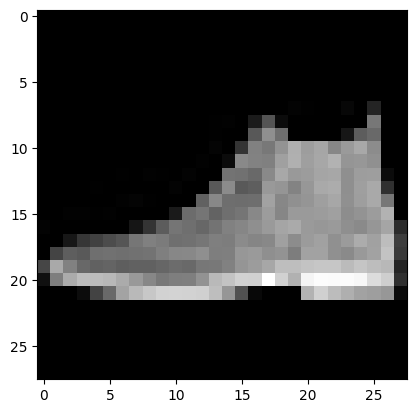

9


In [ ]:
# Take the first test example
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_test[0, ], cmap = 'gray')
plt.show()
print(y_test[0])

In [ ]:
!pip install --upgrade tf-keras-vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.3 MB/s eta 0:00:00


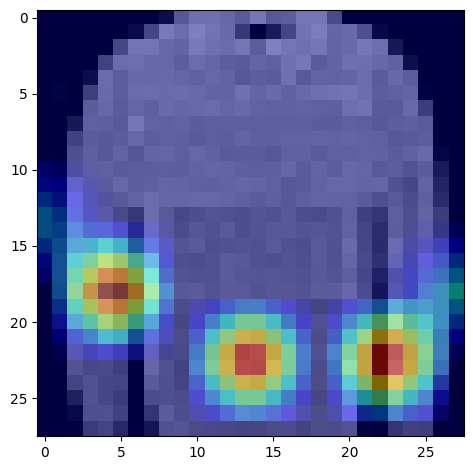

In [ ]:
test_index = 20
# The `output` variable refer to the output of the model,
def loss(output):
    return (output[0][y_test[test_index]])

def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=model_modifier,
                  clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss,
              x_test[test_index].reshape(1, 28, 28, 1),
              penultimate_layer=-1, # model.layers number
             )
cam = normalize(cam)

heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
plt.imshow(x_test[test_index, ], cmap='gray')
plt.imshow(heatmap, cmap='jet', alpha=0.5) # overlay
plt.tight_layout()
plt.show()